# US Immigration Analysis
### Data Engineering Capstone Project

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.


In [1]:
# Do all imports and installs here
import logging
from etl import (
    get_spark_session,
    get_immigration_data,
    get_demographics_data,    
    logger
)
from utility import (
    visualize_missing_values
)
logger.setLevel(logging.WARN) # To suppress etl logs in notebook
spark = get_spark_session()


In [2]:
df_immigration = get_immigration_data(spark)
df_immigration.printSchema()

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable = 

In [4]:
df_immigration.limit(10).toPandas()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,5748517.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,CA,20582.0,...,None,M,1976.0,10292016,F,None,QF,9.495387e+10,00011,B1
1,5748518.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,NV,20591.0,...,None,M,1984.0,10292016,F,None,VA,9.495562e+10,00007,B1
2,5748519.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20582.0,...,None,M,1987.0,10292016,M,None,DL,9.495641e+10,00040,B1
3,5748520.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1987.0,10292016,F,None,DL,9.495645e+10,00040,B1
4,5748521.0,2016.0,4.0,245.0,438.0,LOS,20574.0,1.0,WA,20588.0,...,None,M,1988.0,10292016,M,None,DL,9.495639e+10,00040,B1
5,5748522.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20579.0,...,None,M,1959.0,10292016,M,None,NZ,9.498180e+10,00010,B2
6,5748523.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1950.0,10292016,F,None,NZ,9.497969e+10,00010,B2
7,5748524.0,2016.0,4.0,245.0,464.0,HHW,20574.0,1.0,HI,20586.0,...,None,M,1975.0,10292016,F,None,NZ,9.497975e+10,00010,B2
8,5748525.0,2016.0,4.0,245.0,464.0,HOU,20574.0,1.0,FL,20581.0,...,None,M,1989.0,10292016,M,None,NZ,9.497325e+10,00028,B2
9,5748526.0,2016.0,4.0,245.0,464.0,LOS,20574.0,1.0,CA,20581.0,...,None,M,1990.0,10292016,F,None,NZ,9.501355e+10,00002,B2


In [3]:
demographics_df = get_demographics_data(spark)
demographics_df.printSchema()

root
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- median_age: double (nullable = true)
 |-- male_population: integer (nullable = true)
 |-- female_population: integer (nullable = true)
 |-- total_population: integer (nullable = true)
 |-- number_of_veterans: integer (nullable = true)
 |-- foreign_born: integer (nullable = true)
 |-- average_household_size: double (nullable = true)
 |-- state_code: string (nullable = true)
 |-- race: string (nullable = true)
 |-- count: integer (nullable = true)



In [29]:
pd.DataFrame(demographics_df.head(10), columns = demographics_df.columns)

,city,state,median_age,male_population,female_population,total_population,number_of_veterans,foreign_born,average_household_size,state_code,race,count
0,Silver Spring,Maryland,33.8,40601,41862,82463,1562,30908,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129,49500,93629,4147,32935,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040,46799,84839,4819,8229,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127,87105,175232,5821,33878,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040,143873,281913,5829,86253,2.73,NJ,White,76402
5,Peoria,Illinois,33.1,56229,62432,118661,6634,7517,2.40,IL,American Indian and Alaska Native,1343
6,Avondale,Arizona,29.1,38712,41971,80683,4815,8355,3.18,AZ,Black or African-American,11592
7,West Covina,California,39.8,51629,56860,108489,3800,37038,3.56,CA,Asian,32716
8,O'Fallon,Missouri,36.0,41762,43270,85032,5783,3269,2.77,MO,Hispanic or Latino,2583
9,High Point,North Carolina,35.5,51751,58077,109828,5204,16315,2.65,NC,Asian,11060


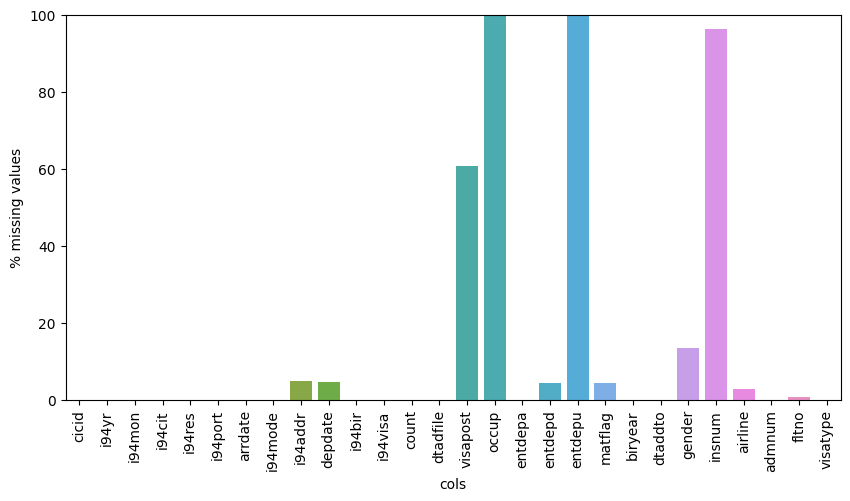

In [4]:
visualize_missing_values(df_immigration)

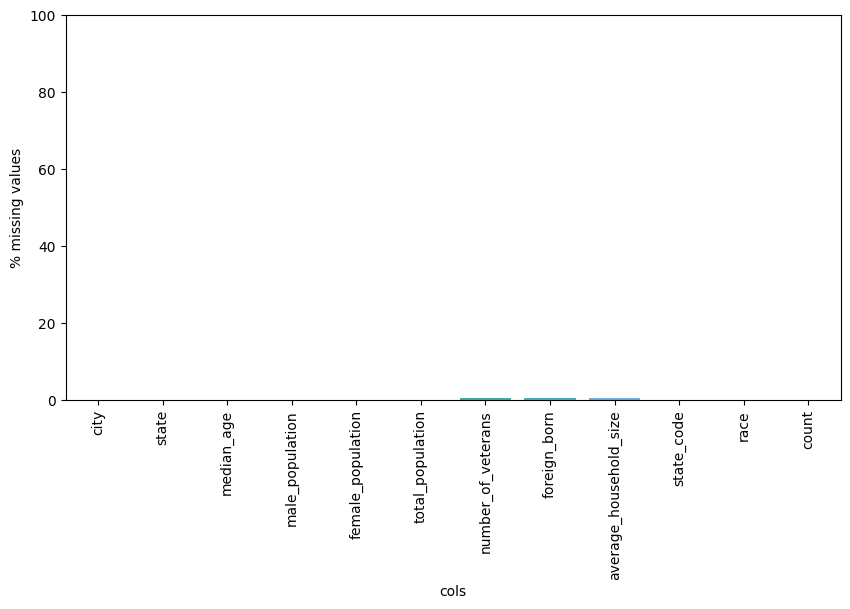

In [5]:
visualize_missing_values(demographics_df)